In [386]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import astropy

### Unit and Quantaties

In [387]:
from astropy import units as u

In [388]:
distance = 1 * u.lightyear  #1
print(distance) 

1.0 lyr


In [389]:
distance3 = u.Quantity('2 lyr')
print(distance)

1.0 lyr


In [390]:
u.meter

Unit("m")

In [391]:
distance1 = [1,4,6] * u.lightyear
print(distance1)
distance2 = np.array([1,3,5]) * u.lightyear
print(distance2)

[1. 4. 6.] lyr
[1. 3. 5.] lyr


In [392]:
distance1.value

array([1., 4., 6.])

In [393]:
distance2.value

array([1., 3., 5.])

In [394]:
type(distance1)

astropy.units.quantity.Quantity

In [395]:
type(distance2)

astropy.units.quantity.Quantity

In [396]:
np.max(distance1)

<Quantity 6. lyr>

In [397]:
np.mean(distance1)

<Quantity 3.66666667 lyr>

In [398]:
# In CASE of log we are required to give a reference value to make it dimensionless.
np.log((30 * u.MeV) / (10 * u.MeV)) # without 10 MeV it will give an error

<Quantity 1.09861229>

In [399]:
distance1.to('meter') # Unit Conversion

<Quantity [9.46073047e+15, 3.78429219e+16, 5.67643828e+16] m>

In [400]:
distance1.to('parsec')

<Quantity [0.30660139, 1.22640558, 1.83960836] pc>

In [401]:
speed_of_light = distance/ u.year # we have defined the distance in the first line of code.
print(speed_of_light.to('km/s'))

299792.458 km / s


In [402]:
print(speed_of_light.to('angstrom/day'))  # Bhai SAha!!!

2.5902068371199996e+23 Angstrom / d


In [403]:
speed_of_light.si  #SI units

<Quantity 2.99792458e+08 m / s>

In [404]:
speed_of_light.cgs  #CGS units

<Quantity 2.99792458e+10 cm / s>

### Equivalencies

In [405]:
frequency = 3e20 * u.hertz
frequency.to('MeV',equivalencies = u.spectral())  # by using equivalencies = u.spectra() we are able to do so

<Quantity 1.24070031 MeV>

In [406]:
frequency.to('picometer',equivalencies=u.spectral())

<Quantity 0.99930819 pm>

In [407]:
# Temperature
temperature = 25 * u.Celsius

In [408]:
temperature.to('K',equivalencies=u.temperature()) # cool Room Temperature

<Quantity 298.15 K>

In [409]:
with u.imperial.enable():
    print(temperature.to("deg_F",equivalencies=u.temperature())) 

77.0 deg_F


#### Constants (Special)

In [410]:
from astropy import constants as const
print(const.c.to('km/hour')) # speed of light

1079252848.8 km / h


In [411]:
@u.quantity_input(frequency=u.hertz,temperature=u.K)  # defining the units to avoid any error
def Blackbody(frequency,temperature):
    pre_fac = 2 * (const.h * frequency**3)/const.c**2
    expo_fac = 1/(np.exp((const.h* frequency)/(const.k_B * temperature))-1)
    return pre_fac * expo_fac

In [412]:
Blackbody(300*u.hertz,400*u.K)

<Quantity 1.10604915e-32 Hz3 J s3 / m2>

#### Interfacing quantaties with third-party code

/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


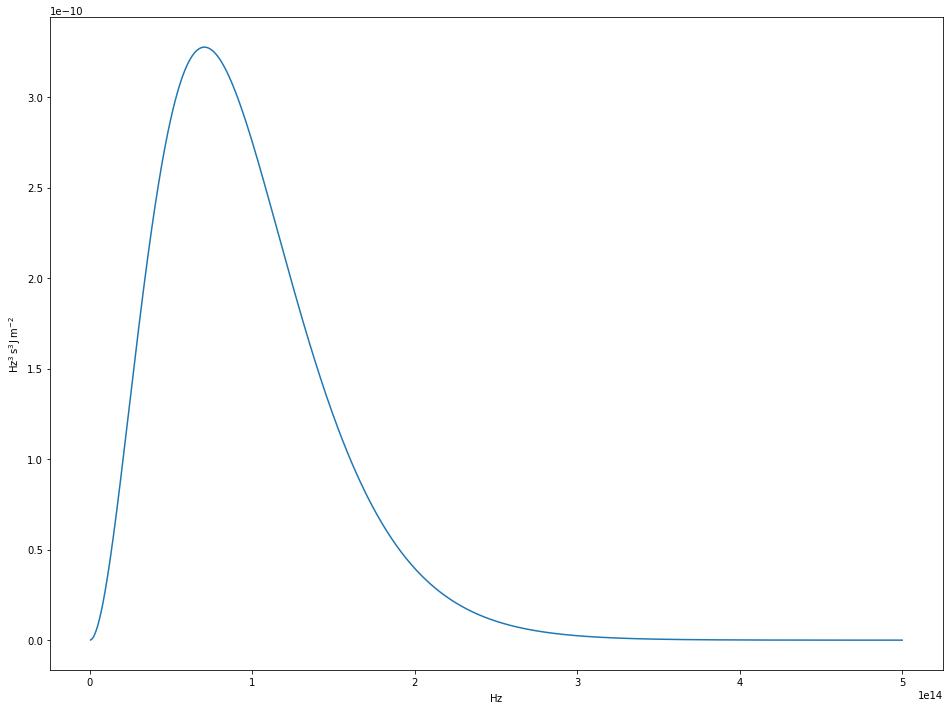

In [413]:
from astropy.visualization import quantity_support 
plt.figure(figsize = (16,12))
temperature = 1200 * u.K
frequencies = np.linspace(1E-5, 0.5e15, 1000) * u.hertz
radiation = Blackbody(frequency = frequencies,temperature = temperature)

with quantity_support():
    plt.plot(frequencies,radiation)

In [414]:
# log functions
emin, emax =[1,10] * u.MeV
energies = np.logspace(np.log10(emin.value),np.log10(emax.value),10) * emin.unit
print(energies)
# The numpy. logspace() function returns number spaces evenly w.r.t interval on a log scale.

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] MeV


In [415]:
energies = np.geomspace(emin,emax,10) #G.P
print(energies)
#geomspace() is used to return numbers spaced evenly on a log scale (a geometric progression).
#This is similar to numpy. logspace() but with endpoints specified directly. Each output sample is a constant multiple of the previous.

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] MeV


### Performance Booster (Cheats)

In [416]:
values = np.ones((500,500,500))  # (500 rows, 500 columns, 500 ones matrice)

In [417]:
%%timeit  #1
quantity = values * u.kpc
# the magic commands %timeit and %%timeit is used to measure the execution time of your code.

907 ms ± 358 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [418]:
%%timeit #2
quantity = u.Quantity(values,unit ="kpc",copy=False)
# This command takes much less time

3.93 µs ± 33.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Coordinates

In [419]:
from astropy.coordinates import SkyCoord

In [420]:
position_crab = SkyCoord(77.2969204 * u.deg,30.1680858 * u.deg ,frame='icrs')  # Jagadhri, Haryana
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (77.2969204, 30.1680858)>


In [421]:
positions = SkyCoord([345.,234.8]*u.deg,[-0.1,0.2]* u.deg,frame='galactic')
print(positions)

<SkyCoord (Galactic): (l, b) in deg
    [(345. , -0.1), (234.8,  0.2)]>


In [422]:
# in terms of day,hour,minute,second
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>


In [423]:
SkyCoord.from_name('Crab')  # position coordinate of crab nebula

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63311446, 22.01448714)>

In [424]:
SkyCoord.from_name('Polaris')  # position coordinate of Polaris nebula

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [425]:
position_polaris = SkyCoord.from_name('Polaris') 
position_polaris2 = position_polaris1.transform_to('galactic')

In [426]:
# inter-conversion of icrs and galactic coorniate
pos_gal = position_crab.transform_to('galactic')
print(pos_gal)

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>


In [427]:
# Access to latitude and longitude 
position_polaris.data.lon # hour-minute-second  while using icrs

<Longitude 37.95456067 deg>

In [428]:
position_polaris2.data.lon # RAdians when using galactic

<Longitude 2.1516515 rad>

## Measuring Distances between Positions in SKY

In [429]:
SkyCoord.from_name('Saga').transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (266.416826, -29.007797)>

In [430]:
# Angular Distance between sagaterious and Polaris
position_saga = SkyCoord (266.416826 * u.deg , -29.007797 * u.deg,frame='icrs') 
position_saga.separation(position_polaris)

<Angle 119.49429334 deg>

In [431]:
# Inverse operation
position_crab.directional_offset_by(
    separation = 1* u.deg ,position_angle = 0 * u.deg
)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 23.01447222)>

#### ALT - AZ coordinates (optional)
**_In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time_**

In [432]:
from astropy.coordinates import EarthLocation , AltAz
from astropy.time import Time

In [433]:
Jagadhri = EarthLocation(lat = 77.2969204 * u.deg,lon = 30.1680858 * u.deg)
print(Jagadhri.geodetic)

GeodeticLocation(lon=<Longitude 30.1680858 deg>, lat=<Latitude 77.2969204 deg>, height=<Quantity 0. m>)


In [434]:
print(Jagadhri)

(1216456.92644372, 707088.0333519, 6200146.14198721) m


In [435]:
now = Time.now()
print(now)

2022-03-12 19:53:10.876988


__Now we can define a horizontal coordinate system using the AltAz class and use it to convert from the sky coordinate:__

In [436]:
altaz = AltAz(obstime = now,location= Jagadhri)
polaris_altaz = position_polaris.transform_to(altaz)
print(position_polaris)

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>


### Tables

In [437]:
from astropy.table import Table

In [438]:
table = Table()

__We add columns to the table like we would add entries to a dictionary__

In [439]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A', 'Vela Junior']
table['GLON'] = [184.5575438, 0, 111.74169477, 266.25914205] * u.deg # galactic longitude
table['GLAT'] = [-5.78427369, 0, -2.13544151, -1.21985818] * u.deg  # galactic latitude
table['Source_Class'] = ['pwn', 'unc', 'snr', 'snr']

In [440]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [441]:
table.columns

<TableColumns names=('Source_Name','GLON','GLAT','Source_Class')>

In [442]:
table['GLON','Source_Name']

GLON,Source_Name
deg,
float64,str11
184.5575438,Crab
0.0,Sag A*
111.74169477,Cas A
266.25914205,Vela Junior


In [443]:
table['GLAT'].quantity.to('arcmin') # value

<Quantity [-347.0564214,    0.       , -128.1264906,  -73.1914908] arcmin>

In [444]:
table[0:2]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


In [445]:
# using Boolean
selection = table['Source_Name'] == 'Sag A*'
print(selection)
print("------------------------------------")
table[selection]

[False  True False False]
------------------------------------


Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Sag A*,0.0,0.0,unc


## Reading-Writting Table to disc

In [446]:
table.write('//Users/dhruvkumar/Desktop/h_m51_h_s20_drz_sci',format = 'fits',overwrite=True) # we created a fits file here.

In [447]:
table.read('//Users/dhruvkumar/Desktop/h_m51_h_s20_drz_sci') #We read the created fits file

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [448]:
table.write('//Users/dhruvkumar/Desktop/example.ecsv',overwrite = True,format = 'ascii.ecsv') # created a ecsv file

In [449]:
! cat //Users/dhruvkumar/Desktop/example.ecsv # Here, we get the meta data as well

# %ECSV 1.0
# ---
# datatype:
# - {name: Source_Name, datatype: string}
# - {name: GLON, unit: deg, datatype: float64}
# - {name: GLAT, unit: deg, datatype: float64}
# - {name: Source_Class, datatype: string}
# schema: astropy-2.0
Source_Name GLON GLAT Source_Class
Crab 184.5575438 -5.78427369 pwn
"Sag A*" 0.0 0.0 unc
"Cas A" 111.74169477 -2.13544151 snr
"Vela Junior" 266.25914205 -1.21985818 snr


### Indexing and Grouping

In [450]:
table.add_index(colnames="Source_Name")

In [451]:
table.loc["Cas A"]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Cas A,111.74169477,-2.13544151,snr


In [452]:
table_grouped = table.group_by("Source_Class")

for group in table_grouped.groups:
    print(group,"\n")
# pwn,snr,unc are grouped seperately    

Source_Name     GLON        GLAT    Source_Class
                deg         deg                 
----------- ----------- ----------- ------------
       Crab 184.5575438 -5.78427369          pwn 

Source_Name     GLON         GLAT    Source_Class
                deg          deg                 
----------- ------------ ----------- ------------
      Cas A 111.74169477 -2.13544151          snr
Vela Junior 266.25914205 -1.21985818          snr 

Source_Name GLON GLAT Source_Class
            deg  deg              
----------- ---- ---- ------------
     Sag A*  0.0  0.0          unc 



#### Special one

In [453]:
table.sort('GLON') # the table is arranged in increasing order of GLON values.
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Crab,184.5575438,-5.78427369,pwn
Vela Junior,266.25914205,-1.21985818,snr


In [454]:
table.remove_row(2)

In [455]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [456]:
for row in table:
    print(row["Source_Name"])

Sag A*
Cas A
Vela Junior


In [457]:
table.show_in_browser(jsviewer=True)  # The table get opened on a new browser window

In [458]:
table.show_in_notebook() # shon in Notebook

idx,Source_Name,GLON,GLAT,Source_Class
,,deg,deg,
0,Sag A*,0.0,0.0,unc
1,Cas A,111.74169477,-2.13544151,snr
2,Vela Junior,266.25914205,-1.21985818,snr


## FITS Image and WCS

In [459]:
from astropy.io import fits

In [460]:
hdulist = fits.open('//Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz')

In [461]:
hdulist.info()

Filename: //Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


In [462]:
image_hdu = hdulist[0] # PRIMARY

In [463]:
image_hdu.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

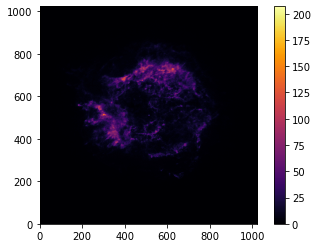

In [464]:
# Let'see the image
plt.imshow(image_hdu.data, origin='lower', cmap='inferno')
plt.colorbar() # BeautiFul

In [465]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

------------------------------------------------------------------------------------------------------------------------------------------------  
__We now use the header information to create a world coordinate to pixel coordinate transformation, using the astropy.wcs.WCS class:__

In [466]:
from astropy.wcs import WCS

In [467]:
wcs = WCS(image_hdu.header)
print(wcs) # Projection is Defined
# tangential- projection

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024


Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


----------------------------------------------------------------------------------------------------------------------------------------  
__Using the helper methods SkyCoord.to_pixel() and SkyCood.from_pixel() we can now convert every position in the image to the corresponding sky coordinate:__

In [468]:
SkyCoord.from_pixel(0,0,wcs) # we get the coordinate through the image (META_DATA)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

In [469]:
# Inverse
position_casa = SkyCoord('23h23m27.94s','+58d48m42.2s',frame='icrs')
position_casa.to_pixel(wcs)
# ra,dec

(array(511.59897551), array(510.89019587))

## Plotting of sky images

__The Matplotlib package is a very popular plotting package for Python. Astropy provides a helper module astropy.visualization.wcsaxes to simplify plotting of sky images with Matplotlib.__
__To use it we just pass projection=wcs to the plt.subplot() function:__



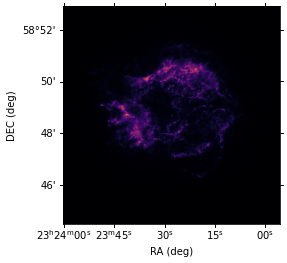

In [470]:
ax = plt.subplot(projection=wcs)
ax.imshow(image_hdu.data,cmap='inferno',origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

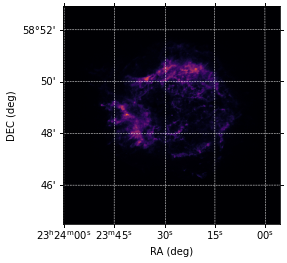

In [471]:
ax.grid(linewidth='0.5',linestyle='dashed',color='white')
ax.figure

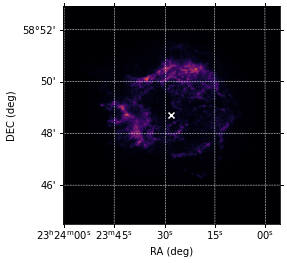

In [472]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg
ax.scatter(ra,dec,transform= ax.get_transform('icrs'),color='white', marker ='x')
ax.figure

__We can also add geometrical shapes to the image to illustrate regions:__

In [473]:
from matplotlib.patches import Circle
from astropy.wcs.utils import proj_plane_pixel_scales

In [474]:
# Transform to pixel coordinates
xy = ax.wcs.world_to_pixel(position_casa)
pixel_size = proj_plane_pixel_scales(wcs)[0] * u.deg
radius = 1.7 * u.arcmin / pixel_size

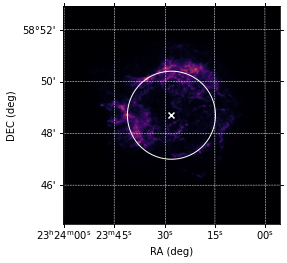

In [475]:
circle = Circle(
    xy = xy,
    radius = radius.to_value(""),
    edgecolor = "w",
    facecolor="None"
)
ax.add_patch(circle)
ax.figure